<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/Viajante_por_evolutivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crea un programa en Python que resuelva el problema para al menos 5 poblaciones (por ejemplo Telde, Gáldar, etc) usando el algoritmo evolutivo cuyas funciones de mutación y de recombinación vienen descritas en  https://www.youtube.com/watch?v=3Kzj2FNaua8

La relación entre los nodos (ciudades) será la siguiente:

'0-LPGC','1-Telde','2-Arucas','3-Teror','4-Agaete','5-San Bartolomé de Tirajana'

Creo la Matriz de distancias:
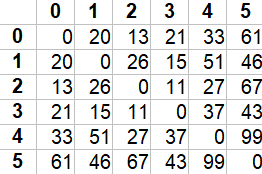

In [157]:
def crear_distancias():
  matriz_distancias =[[  0,  20, 13, 21, 33, 61],
                       [ 20,  0, 26, 15, 51, 46],
                       [ 13, 26,  0, 11, 27, 67],
                       [ 21, 15, 11,  0, 37, 43],
                       [ 33, 51, 27, 37,  0, 99],
                       [ 61, 46, 67, 43, 99,  0]]
  return matriz_distancias


Array de ciudades

In [158]:
def crear_ciudades():
  array_ciudades = ['LPGC','Telde','Arucas','Teror','Agaete','San Bartolomé de Tirajana']
  return array_ciudades

Array de coordenadas


In [216]:
def crear_coordenadas():
  #array_coordenadas = [[1,8],[5,9],[1,5],[4,4],[3,1],[9,6]]
  array_coordenadas = [[8,8],[9,6],[6,7],[5,5],[1,7],[6,1]]
  return array_coordenadas

***Hiperparámetros***

**p**  - Número de individuos que constituyen una población

**m**  - La cantidad de individuos mejores que trascienden a la siguiete
generación

**g**  - Número de generaciones que se van a probar

**pm** - Probabilidad de mutación. Probabilidad de que un determinado hijo, mute

**pr** - Probabilidad de recombinación. Probabilidad de que los genes de dos padres se recombinen

In [244]:
#hiperparámetros
p=10
m=5
g=5
pm=10 #En porcentaje. Debe ser baja al principio
pr=70 #En porcentaje. Debe ser alta al principio
#parámetros iniciales
distancia_minima = 400
mejor_ruta =np.zeros([7],dtype=int)
mejor_ruta = [0, 0, 0, 0, 0, 0, 400]


Genero la primera población de individuos


In [166]:
import random
import numpy as np
import matplotlib.pyplot as plt

def individuos_iniciales(p):
  elementos =np.array ([0,1,2,3,4,5])
  permutaciones = np.zeros([p,6], dtype=int)
  for i in range(p):
    np.random.shuffle(elementos)
    for j in range(len(elementos)):
        permutaciones[i][j]=elementos[j]
  return permutaciones

Evaluar , con la función de ajuste la validez de la población existente

In [234]:
def ajuste (p_poblacion, p_distancias, p_distancia_minima, p_mejor_ruta):
  nueva_generacion = np.zeros([p,7],dtype=int) #matriz que albergará las rutas con sus distancias, las columnas son el número de ciudades, más una, que albergará la suma de distancias entre ellas
  p_ruta_minima=p_mejor_ruta
  for i in range(len(p_poblacion)):
    dist =0
    for j in range(5): # número de elementos de la fila -1 porque vamos a ir del elemento 5 al 6, y luego , para cerrar el círculo, calculamos la distancia del elemento 6 al 0, fuera del bucle
      ciudad1=p_poblacion[i][j]
      ciudad2=p_poblacion[i][j+1]
      dist += p_distancias[ciudad1][ciudad2]

    #cierro el círculo, calculando la distancia desde el último elemento al primero, de este individuo
    ciudad1=p_poblacion [i][0]

    #ciudad2 ya está calculada dentro del bucle
    dist += p_distancias[ciudad1][ciudad2]
    for j in range(6):
      nueva_generacion[i][j]=p_poblacion[i][j]
    nueva_generacion[i][6]=dist

    if dist>0 and dist<=p_distancia_minima :
      fila= nueva_generacion[i]
      p_mejor_ruta = fila.reshape(7)
      p_distancia_minima =dist

  return nueva_generacion, p_distancia_minima, p_mejor_ruta

Método para representar un individuo cualquiera en términos de ciudades

In [6]:
def representar (individuo):
  cadena=''
  array_ciudades = crear_ciudades()

  for i in range(6):
    ciudad = individuo[i]
    cadena += array_ciudades[ciudad] + ' -> '
  cadena += array_ciudades[individuo[0]] + ' -> '
  return cadena[:-4]

Método para representar las coordenadas de cada ciudad y una flecha que las una, según la ruta óptima

In [237]:
def representar_coordenadas (ruta):
  coordenadas =crear_coordenadas()
  ciudades = crear_ciudades()

  for i in range(5):
    origen = coordenadas[ruta[i]]
    x=origen[0]
    y=origen[1]
    plt.scatter(x, y)
    plt.annotate(ciudades[ruta[i]], (x, y))
    destino =coordenadas[ruta[i+1]]
    # Dibujar una flecha entre las coordenadas origen y destino
    plt.arrow(origen[0],origen[1],destino[0]-origen[0],destino[1]-origen[1], head_width=0.1, head_length=0.1, color='blue', linewidth=1)

  origen = coordenadas[ruta[5]]
  x=origen[0]
  y=origen[1]
  plt.scatter(x, y)
  plt.annotate(ciudades[ruta[5]], (x, y))
  destino =coordenadas[ruta[0]]

  # Dibujar una flecha entre las coordenadas origen y destino
  plt.arrow(origen[0],origen[1],destino[0]-origen[0],destino[1]-origen[1], head_width=0.1, head_length=0.1, color='blue', linewidth=1)

  # Mostrar la figura
  plt.show()

Función de ***selección***, tomamos los p-m elementos peores y los eliminamos de la matriz de seleccion


In [60]:
def seleccion ():
  #mejores = p_poblacion[np.argpartition(p_poblacion[:,6],m-1)[:m]]
  distancia = poblacion[:, 6]
  distancias=distancia.argsort()
  lista= distancias.tolist()
  # Ordenar la matriz en función de los valores de la columna con índice 6, que es la que guarda la distancia entre las ciudades de cada individuo
  matriz_ordenada = poblacion[lista]
  # Seleccionar las m filas superiores de la matriz ordenada, siempre que haya más elementos que los m mejores
  mejores=matriz_ordenada
  if len(poblacion)>m+1:
    indices = np.arange(m+1)
    mejores = matriz_ordenada [indices]
  return mejores

Funcion de ***recombinación*** de la matriz de poblacion
En función del hiperparámetro de probabilidad de recombinación

In [43]:
def recombinacion (p_poblacion):
  padres =0
  progenitores = np.zeros((5,7),dtype=np.int32)
  for i in range (len(poblacion)-1):
    prob_recomb_individuo =random.randint(0, 100) #probabilidad de que este individuo se recombine con otro
    if prob_recomb_individuo < pr:
      padres+=1
      progenitores[padres-1]=poblacion [i]
  if padres>1:
    for i in range(padres):
      if i==padres-1:
        if len (p_poblacion)<p-1:
          p_poblacion = recombinar (p_poblacion,progenitores[i],progenitores[0])
          return np.unique(p_poblacion,axis=0)
      else:
        if len (p_poblacion)<p-1:
          p_poblacion = recombinar (p_poblacion,progenitores[i],progenitores[i+1])
  return np.unique(p_poblacion,axis=0)

Al recombinar dos individuos, hago que los elementos de uno sean los índices que voy a buscar en el otro. Los "hijos" resultantes serán individuos nuevos que tienen elementos de sus dos progenitores

In [49]:
def recombinar(p_poblacion,padre1, padre2):
  hijo1 = np.zeros((7),dtype=np.int32)
  hijo2 = np.zeros((7),dtype=np.int32)

  for i in range (len(padre1)-1): #sacamos del bucle la última columna, que representa la distancia
    ind1=padre1[i]
    ind2=padre2[i]
    hijo1[i]= padre2[ind1]
    hijo2[i]= padre1[ind2]

  prob_mutar_individuo1 =random.randint(0, 100)
  prob_mutar_individuo2 =random.randint(0, 100)

  #para controlar la poblacion, pregunto primero si no se ha alcanzado el número máximo de individuos
  if len (p_poblacion)<(p-1):
      if prob_mutar_individuo1<pm:
          hijo1=mutar(hijo1)
      p_poblacion = np.append(p_poblacion, [hijo1], axis=0)
      np.unique(p_poblacion,axis=0)
  if len (p_poblacion)<(p-1):
      if prob_mutar_individuo2<pm:
          hijo2=mutar(hijo2)
      p_poblacion = np.append(p_poblacion, [hijo2], axis=0)
      np.unique(p_poblacion,axis=0)
  return p_poblacion


Función de ***Mutación*** dado un hijo, intercambiamos las posiciones de dos ciudades al azar

In [116]:
def mutar(individuo):
    ciudad1 = random.randint(1, len(individuo)-2) #quito 1 porque empieza en 0 y otro pq el ultimo elemento es la distancia
    ciudad2 = random.randint(1, len(individuo)-2)
    individuo[ciudad1],individuo[ciudad2]= individuo[ciudad2],individuo[ciudad1] # La asignación tiene que ser en una línea para que no se repitan valores
    return individuo

***Programa principal***


Población inicial
[[0 3 1 2 4 5]
 [0 4 5 2 1 3]
 [2 4 0 3 1 5]
 [1 2 3 5 0 4]
 [4 5 0 3 2 1]
 [3 0 1 2 5 4]
 [4 1 3 5 2 0]
 [5 3 0 4 1 2]
 [1 5 0 3 2 4]
 [4 5 2 3 0 1]]
Distancia mínima: 209
------------------------------------------------------------------------------------------
Generacion:  1
Mejor ruta:
Arucas -> Agaete -> LPGC -> Teror -> Telde -> San Bartolomé de Tirajana -> Arucas
Distancia : 209
------------------------------------------------------------------------------------------
Generacion:  2
Mejor ruta:
Arucas -> Agaete -> LPGC -> Teror -> Telde -> San Bartolomé de Tirajana -> Arucas
Distancia : 209
------------------------------------------------------------------------------------------
Generacion:  3
Mejor ruta:
Arucas -> Agaete -> LPGC -> Teror -> Telde -> San Bartolomé de Tirajana -> Arucas
Distancia : 209
------------------------------------------------------------------------------------------
Generacion:  4
Mejor ruta:
Arucas -> Agaete -> Telde -> San Bartolomé 

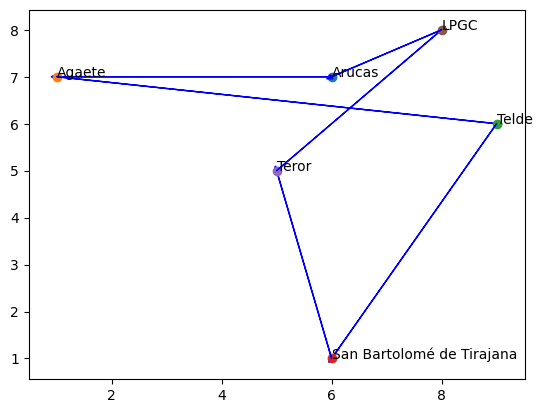

In [245]:
poblacion = individuos_iniciales(p)
print('Población inicial')
print(poblacion)
distancias =crear_distancias()

poblacion, distancia_minima, ruta_minima =ajuste (poblacion, distancias, distancia_minima,mejor_ruta) #fitness

print('Distancia mínima:' ,distancia_minima)
print('-'* 90)
distancia_minima +=100 #para que las siguientes generaciones encuentren una distancia mínima
for i in range(g): #se evaluarán los datos para las siguientes g generaciones
  poblacion = seleccion()
  if len(poblacion)<p-1 :
    poblacion = recombinacion(poblacion)
  poblacion, distancia_minima, ruta_minima =ajuste (poblacion, distancias, distancia_minima,ruta_minima) #fitness
  #eliminar las posibles filas a 0, comprobando que la distancia sea 0
  inds = np.where(poblacion[:, 6] == 0)[0]
  # Eliminar las filas de la matriz
  poblacion = np.delete(poblacion, inds, axis=0)
  print('Generacion: ',i+1) # la población inicial es la "Generación 0", como el array empieza en la posición 0, sumo 1
  print('Mejor ruta:')
  print(representar(ruta_minima))
  print('Distancia :' ,distancia_minima)
  print('-'* 90)
representar_coordenadas(ruta_minima)